# Assignment 5: Deep Learning {-}

This assignment aims at familiarizing you with training and testing a Deep Neural Network (DNN). Here are the BASIC requirements of the assignment:

- Load the data.
- Process and normalize the images.
- Build, train and test the two following Deep Neural Networks:
 - First network: must at least consist of three (03) Convolutional layers, two (02) Fully Connected layers, two (02) Pooling layers.
 - Second network: has at most 4M (four millions) parameters (use model.summary() to check). The architecture is of your choice.
- Evaluate the model performance on the test set.

The dataset you will be working on is cifar10 (https://www.cs.toronto.edu/~kriz/cifar.html) which consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follows the ten object classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Here follows some data samples in the dataset:

![alt text](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment5-notebook.ipynb: Jupyter notebook containing source code.
- ./\<Test-accuracy>-\<StudentID>.txt: accuracy of the second network on the test set (for extra credit, see the 'Evaluation' part below). For example if you get 0.8124 accuracy, the name of this file is 08124-2012345.txt. The file content is left empty.

The submission folder is named ML4DS-\<StudentID>-Assignment5 (e.g., ML4DS-2012345-Assigment5) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have modeling steps other than the basic requirements and achieve an excellent model accuracy. In addition, your code should conform to a Python coding convention such as PEP-8.

EXTRA CREDIT: Top-3 submissions achieving the highest test accuracy on the second network (of 4M params at most) will be rewarded an extra credit. Please follow the submission format to be eligible for this extra credit.

### Deadline {-}
Please visit Canvas for details.

### Load the libraries and data

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow

In [2]:
# Import libraries
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dense, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [3]:
# PLEASE DO NOT CHANGE THIS CODE

# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

170498071/170498071 [==============================] - 3s 0us/step
Train shape: X_train = (45000, 32, 32, 3), y_train = (45000, 1)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


### Process and normalize images

In [4]:
# Normalize pixel values
X_train_norm, X_val_norm, X_test_norm = X_train/255.0, X_val/255.0, X_test/255.0

# One-hot-encoding labels
y_train, y_val, y_test = to_categorical(y_train), to_categorical(y_val), to_categorical(y_test)

### First Network

In [ ]:
# Build the model using the functional API
# input layer
i = Input(shape=X_train_norm[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.5)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(10, activation='softmax')(x)

model_6 = Model(i, x)

# model description
model_6.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_196 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_187 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_197 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_188 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 16, 16, 32)       0  

In [ ]:
# Compile the model
model_6.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy']) # Define initial learning rate and metrics.

# Train the model. Using Colab for training
history_6 = model_6.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=1024, # Batch size
                    epochs=200, # Number of training epochs
                    validation_data=(X_val_norm, y_val)) # Validation set

Epoch 1/200
44/44 [==============================] - 7s 132ms/step - loss: 2.6084 - accuracy: 0.2632 - val_loss: 2.6524 - val_accuracy: 0.0960
Epoch 2/200
44/44 [==============================] - 6s 125ms/step - loss: 1.5936 - accuracy: 0.4099 - val_loss: 3.5880 - val_accuracy: 0.0960
Epoch 3/200
44/44 [==============================] - 6s 127ms/step - loss: 1.4151 - accuracy: 0.4795 - val_loss: 3.9778 - val_accuracy: 0.0960
Epoch 4/200
44/44 [==============================] - 6s 126ms/step - loss: 1.2563 - accuracy: 0.5457 - val_loss: 3.6856 - val_accuracy: 0.1106
Epoch 5/200
44/44 [==============================] - 6s 126ms/step - loss: 1.1333 - accuracy: 0.5934 - val_loss: 3.4078 - val_accuracy: 0.1142
Epoch 6/200
44/44 [==============================] - 6s 125ms/step - loss: 1.0352 - accuracy: 0.6301 - val_loss: 3.1019 - val_accuracy: 0.1828
Epoch 7/200
44/44 [==============================] - 6s 129ms/step - loss: 0.9599 - accuracy: 0.6594 - val_loss: 2.7794 - val_accuracy: 0.2426

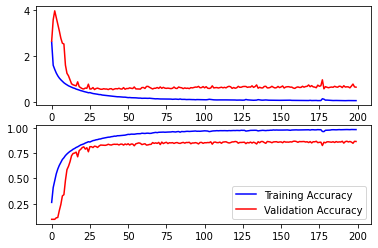

In [ ]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1) 

# Plot training and validation loss
ax[0].plot(history_6.history['loss'], color='b',label='Training Loss')
ax[0].plot(history_6.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history_6.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history_6.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
_, acc_6 = model_6.evaluate(X_test_norm, y_test, verbose = 0)
acc_6

0.8683000206947327

In [ ]:
model_6.save('model_6.h5')

### Second network

Model architecture

In [ ]:
# Build the model using the functional API
# input layer
i = Input(shape=X_train_norm[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.5)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(10, activation='softmax')(x)

model_9 = Model(i, x)

# model description
model_9.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_56 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_56 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_57 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_57 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 16, 16, 32)       0   

In [ ]:
model_9.compile(loss = tf.keras.losses.categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy']) # Define initial learning rate and metrics.

Data augmentation

In [ ]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

In [ ]:
# prepare iterator
it_train = datagen.flow(X_train_norm, y_train, batch_size=64)

Training model

In [ ]:
steps = int(X_train_norm.shape[0] / 64)
history_9 = model_9.fit(it_train, steps_per_epoch=steps, epochs=200,validation_data=(X_val_norm, y_val), verbose = 1)

Epoch 1/200
703/703 [==============================] - 25s 34ms/step - loss: 1.6727 - accuracy: 0.3974 - val_loss: 1.5002 - val_accuracy: 0.4852
Epoch 2/200
703/703 [==============================] - 24s 34ms/step - loss: 1.2279 - accuracy: 0.5634 - val_loss: 1.1912 - val_accuracy: 0.5926
Epoch 3/200
703/703 [==============================] - 24s 34ms/step - loss: 1.0349 - accuracy: 0.6398 - val_loss: 1.1474 - val_accuracy: 0.6176
Epoch 4/200
703/703 [==============================] - 24s 34ms/step - loss: 0.9186 - accuracy: 0.6868 - val_loss: 0.8103 - val_accuracy: 0.7134
Epoch 5/200
703/703 [==============================] - 24s 34ms/step - loss: 0.8407 - accuracy: 0.7126 - val_loss: 1.0267 - val_accuracy: 0.6606
Epoch 6/200
703/703 [==============================] - 24s 34ms/step - loss: 0.7876 - accuracy: 0.7316 - val_loss: 0.9004 - val_accuracy: 0.7068
Epoch 7/200
703/703 [==============================] - 26s 37ms/step - loss: 0.7400 - accuracy: 0.7513 - val_loss: 0.8685 - val_ac

Performance Visualization

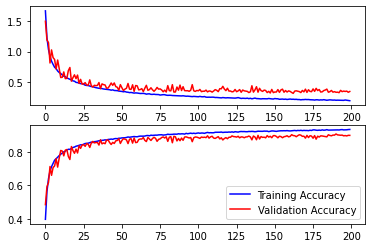

In [ ]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1) 

# Plot training and validation loss
ax[0].plot(history_9.history['loss'], color='b',label='Training Loss')
ax[0].plot(history_9.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history_9.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history_9.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

Evaluate model on test set

In [ ]:
# Show the model performance
result = model_9.evaluate(X_test_norm, y_test)
print('Loss and accuracy on the test set: loss = {}, accuracy = {}'.format(result[0], result[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.3242 - accuracy: 0.8987
Loss and accuracy on the test set: loss = 0.3242151737213135, accuracy = 0.8986999988555908


In [ ]:
# Save model
model_9.save('model_9.h5')

## Other model architectures trials and their results:

### Model 1: 3 blocks of 2xConv2D and 1xMaxPool, epoch = 50

Things to improve: 
*   More epochs
*   More Conv2D blocks




In [ ]:
# Build the model using the functional API
# input layer
i = Input(shape=X_train_norm[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

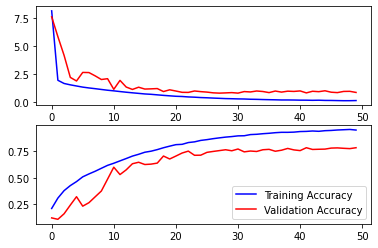

In [ ]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1) 

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
# Compile the model
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-2), metrics=['accuracy']) # Define initial learning rate and metrics.

# Train the model. Using Colab for training
history = model.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=1024, # Batch size
                    epochs=50, # Number of training epochs
                    validation_data=(X_val_norm, y_val)) # Validation set

Epoch 1/50
44/44 [==============================] - 19s 189ms/step - loss: 8.1735 - accuracy: 0.2126 - val_loss: 7.6385 - val_accuracy: 0.1240
Epoch 2/50
44/44 [==============================] - 5s 103ms/step - loss: 1.9667 - accuracy: 0.3101 - val_loss: 5.8682 - val_accuracy: 0.1108
Epoch 3/50
44/44 [==============================] - 5s 104ms/step - loss: 1.6800 - accuracy: 0.3799 - val_loss: 4.1914 - val_accuracy: 0.1628
Epoch 4/50
44/44 [==============================] - 5s 104ms/step - loss: 1.5586 - accuracy: 0.4272 - val_loss: 2.2248 - val_accuracy: 0.2442
Epoch 5/50
44/44 [==============================] - 5s 104ms/step - loss: 1.4556 - accuracy: 0.4648 - val_loss: 1.9035 - val_accuracy: 0.3230
Epoch 6/50
44/44 [==============================] - 5s 105ms/step - loss: 1.3550 - accuracy: 0.5094 - val_loss: 2.6689 - val_accuracy: 0.2342
Epoch 7/50
44/44 [==============================] - 5s 105ms/step - loss: 1.2808 - accuracy: 0.5367 - val_loss: 2.6560 - val_accuracy: 0.2668
Epoch

In [ ]:
_, acc = model.evaluate(X_test_norm, y_test, verbose = 0)
acc

0.7849000096321106

###Model 2: 2 blocks of (2xConv2D + 1xMaxPool) and 3 blocks of (3xConv2D + 1xMaxPool) and 2 Dropout before Dense layers, epoch = 50

Things to improve:

*   More epochs
*   Try different dropout rates



In [ ]:
# Build the model using the functional API
# input layer
i = Input(shape=X_train_norm[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(10, activation='softmax')(x)

model_2 = Model(i, x)

# model description
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0   

In [ ]:
# Compile the model
model_2.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-2), metrics=['accuracy']) # Define initial learning rate and metrics.

# Train the model. Using Colab for training
history_2 = model_2.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=1024, # Batch size
                    epochs=50, # Number of training epochs
                    validation_data=(X_val_norm, y_val)) # Validation set

Epoch 1/50
44/44 [==============================] - 11s 202ms/step - loss: 6.4777 - accuracy: 0.1682 - val_loss: 3218.1216 - val_accuracy: 0.0962
Epoch 2/50
44/44 [==============================] - 6s 141ms/step - loss: 2.1342 - accuracy: 0.2791 - val_loss: 4.8127 - val_accuracy: 0.1444
Epoch 3/50
44/44 [==============================] - 6s 141ms/step - loss: 1.7358 - accuracy: 0.3483 - val_loss: 3.2184 - val_accuracy: 0.1414
Epoch 4/50
44/44 [==============================] - 6s 140ms/step - loss: 1.6164 - accuracy: 0.3931 - val_loss: 3.8046 - val_accuracy: 0.1540
Epoch 5/50
44/44 [==============================] - 6s 140ms/step - loss: 1.5182 - accuracy: 0.4294 - val_loss: 3.1263 - val_accuracy: 0.1776
Epoch 6/50
44/44 [==============================] - 6s 139ms/step - loss: 1.4252 - accuracy: 0.4737 - val_loss: 2.1925 - val_accuracy: 0.2320
Epoch 7/50
44/44 [==============================] - 6s 139ms/step - loss: 1.3398 - accuracy: 0.5090 - val_loss: 2.3102 - val_accuracy: 0.2526
Ep

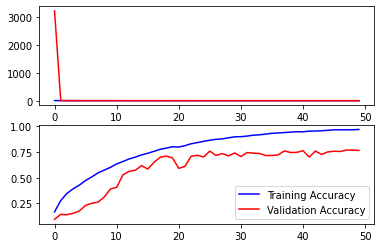

In [ ]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1) 

# Plot training and validation loss
ax[0].plot(history_2.history['loss'], color='b',label='Training Loss')
ax[0].plot(history_2.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history_2.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history_2.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
_, acc_2 = model_2.evaluate(X_test_norm, y_test, verbose = 0)
acc_2

0.7731999754905701

In [ ]:
model_2.save('model_2.h5')

###Model 3: Model 1 + drop_out(0.2) after each maxpool + last dense layer, epoch = 100

Things to improve:
+ Try with other dropout rate

In [ ]:
# Build the model using the functional API
# input layer
i = Input(shape=X_train_norm[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(10, activation='softmax')(x)

model_3 = Model(i, x)

# model description
model_3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_28 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_29 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 32)       0   

In [ ]:
# Compile the model
model_3.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy']) # Define initial learning rate and metrics.

# Train the model. Using Colab for training
history_3 = model_3.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=1024, # Batch size
                    epochs=100, # Number of training epochs
                    validation_data=(X_val_norm, y_val)) # Validation set

Epoch 1/100
44/44 [==============================] - 6s 116ms/step - loss: 2.9153 - accuracy: 0.3084 - val_loss: 2.5851 - val_accuracy: 0.0982
Epoch 2/100
44/44 [==============================] - 5s 109ms/step - loss: 1.4714 - accuracy: 0.4656 - val_loss: 2.8798 - val_accuracy: 0.1092
Epoch 3/100
44/44 [==============================] - 5s 109ms/step - loss: 1.2762 - accuracy: 0.5413 - val_loss: 3.5612 - val_accuracy: 0.1060
Epoch 4/100
44/44 [==============================] - 5s 110ms/step - loss: 1.1315 - accuracy: 0.5952 - val_loss: 4.1691 - val_accuracy: 0.1498
Epoch 5/100
44/44 [==============================] - 5s 110ms/step - loss: 0.9955 - accuracy: 0.6478 - val_loss: 4.7837 - val_accuracy: 0.1054
Epoch 6/100
44/44 [==============================] - 5s 111ms/step - loss: 0.8811 - accuracy: 0.6862 - val_loss: 5.0777 - val_accuracy: 0.1606
Epoch 7/100
44/44 [==============================] - 5s 110ms/step - loss: 0.7834 - accuracy: 0.7239 - val_loss: 4.6793 - val_accuracy: 0.1834

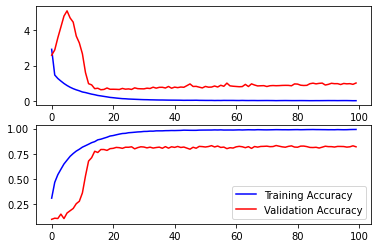

In [ ]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1) 

# Plot training and validation loss
ax[0].plot(history_3.history['loss'], color='b',label='Training Loss')
ax[0].plot(history_3.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history_3.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history_3.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
_, acc_3 = model_3.evaluate(X_test_norm, y_test, verbose = 0)
acc_3

0.8202999830245972

In [ ]:
model_3.save('model_3.h5')

### Model 4: Model 1 + dropout(0.5) after each maxpool and (0.2) before last dense layer, epoch = 100


In [ ]:
# Build the model using the functional API
# input layer
i = Input(shape=X_train_norm[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.5)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.5)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.5)(x)

x = Flatten()(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(10, activation='softmax')(x)

model_4 = Model(i, x)

# model description
model_4.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_34 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_35 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0   

In [ ]:
# Compile the model
model_4.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy']) # Define initial learning rate and metrics.

# Train the model. Using Colab for training
history_4 = model_4.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=1024, # Batch size
                    epochs=100, # Number of training epochs
                    validation_data=(X_val_norm, y_val)) # Validation set

Epoch 1/100
44/44 [==============================] - 6s 124ms/step - loss: 3.3815 - accuracy: 0.2488 - val_loss: 2.3734 - val_accuracy: 0.0960
Epoch 2/100
44/44 [==============================] - 5s 110ms/step - loss: 1.6542 - accuracy: 0.3960 - val_loss: 2.6086 - val_accuracy: 0.1132
Epoch 3/100
44/44 [==============================] - 5s 111ms/step - loss: 1.4881 - accuracy: 0.4613 - val_loss: 2.9469 - val_accuracy: 0.1238
Epoch 4/100
44/44 [==============================] - 5s 111ms/step - loss: 1.3635 - accuracy: 0.5067 - val_loss: 3.1921 - val_accuracy: 0.1898
Epoch 5/100
44/44 [==============================] - 5s 111ms/step - loss: 1.2645 - accuracy: 0.5443 - val_loss: 4.2663 - val_accuracy: 0.1442
Epoch 6/100
44/44 [==============================] - 5s 111ms/step - loss: 1.1743 - accuracy: 0.5764 - val_loss: 4.9666 - val_accuracy: 0.1086
Epoch 7/100
44/44 [==============================] - 5s 111ms/step - loss: 1.0893 - accuracy: 0.6076 - val_loss: 4.0914 - val_accuracy: 0.1860

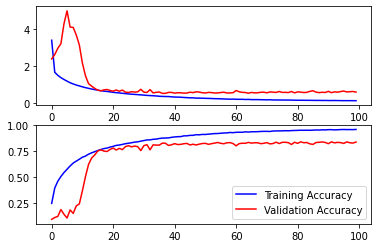

In [ ]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1) 

# Plot training and validation loss
ax[0].plot(history_4.history['loss'], color='b',label='Training Loss')
ax[0].plot(history_4.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history_4.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history_4.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
_, acc_4 = model_4.evaluate(X_test_norm, y_test, verbose = 0)
acc_4

0.8348000049591064

In [ ]:
model_4.save('model_4.h5')

### Model 5: Model 1 + increasing dropout rate after each maxpool and dropout(0.2) before 2 dense layers, epoch = 100

In [ ]:
# Build the model using the functional API
# input layer
i = Input(shape=X_train_norm[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.5)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(10, activation='softmax')(x)

model_5 = Model(i, x)

# model description
model_5.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_40 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_41 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 32)       0   

In [ ]:
# Compile the model
model_5.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy']) # Define initial learning rate and metrics.

# Train the model. Using Colab for training
history_5 = model_5.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=1024, # Batch size
                    epochs=100, # Number of training epochs
                    validation_data=(X_val_norm, y_val)) # Validation set

Epoch 1/100
44/44 [==============================] - 6s 117ms/step - loss: 3.2354 - accuracy: 0.2661 - val_loss: 2.2678 - val_accuracy: 0.1530
Epoch 2/100
44/44 [==============================] - 5s 110ms/step - loss: 1.6084 - accuracy: 0.4158 - val_loss: 3.2087 - val_accuracy: 0.1368
Epoch 3/100
44/44 [==============================] - 5s 112ms/step - loss: 1.4121 - accuracy: 0.4874 - val_loss: 4.1046 - val_accuracy: 0.0960
Epoch 4/100
44/44 [==============================] - 5s 112ms/step - loss: 1.2909 - accuracy: 0.5326 - val_loss: 4.6703 - val_accuracy: 0.0960
Epoch 5/100
44/44 [==============================] - 5s 112ms/step - loss: 1.1895 - accuracy: 0.5726 - val_loss: 4.0212 - val_accuracy: 0.1544
Epoch 6/100
44/44 [==============================] - 5s 111ms/step - loss: 1.0996 - accuracy: 0.6074 - val_loss: 3.6172 - val_accuracy: 0.1920
Epoch 7/100
44/44 [==============================] - 5s 110ms/step - loss: 1.0326 - accuracy: 0.6308 - val_loss: 3.2545 - val_accuracy: 0.2280

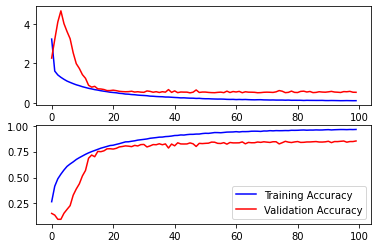

In [ ]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1) 

# Plot training and validation loss
ax[0].plot(history_5.history['loss'], color='b',label='Training Loss')
ax[0].plot(history_5.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history_5.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history_5.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
_, acc_5 = model_5.evaluate(X_test_norm, y_test, verbose = 0)
acc_5

0.8568999767303467

In [ ]:
model_5.save('model_5.h5')